# Part 1: Theory

## Introduction and motivation for the mixed formulation

We will start this tutorial by introducing the idea of the mixed formulation and its difference from the coupled problem formulation:
- In case of the coupled problem, we consider the interplay between two (or more) sub-problems governed by different physical equations and therefore described by two (or more) fields. Examples of coupled problems include thermoelasticity, electroelasticity, fluid-structure interaction and many others. 
- Mixed problem formulation is obtained upon introduction of one (or more) auxiliary variable(s) in a problem governed by one physical process. 

Examples of classical problems permitting (and benefiting from) mixed formulation include, but are not limited to:
- Incompressible elasticity (auxiliary variable: hydrostatic pressure)
- Stokes/Navier-Stokes problem for viscous incompressible flow (auxiliary variable: fluid pressure)
- Convection-Reaction-Diffusion problem (auxiliary variable: flux)
- Mechanical contact problem (auxiliary variable: contact pressure).

There are multiple reasons for using mixed formulation, see [[Boffi, 2013]](#boffi_2013) for more details:
- Presence of constraints in a problem under study (incompressible elasticity/fluid flow, contact problem)
- Importance of new variables appearing in the formulation (accurate computation of stresses in elastic problem and fluxes in diffusion problem)
- Possibility to obtain weaker formulation with less requirements on the regularity of the solution
- Embedded reliable and efficient <em>a posteriori</em> error estimates.

Note that in this tutorial particular attention will be given to the error estimators naturally emerging within the mixed formulation and permitting easy implementation of adaptive refinement.

## Derivation of the mixed weak form for the Poisson equation

The strong form of the boundary value problem for the Poisson equation reads:

\begin{align}
\label{eq:poisson}-\textrm{div}\:(\nabla u) = f & \quad \textrm{in}\; \Omega \\
\label{eq:dirichlet}u = 0 & \quad \textrm{on}\; \partial\Omega,
\end{align}

where the homogeneous Dirichlet boundary condition is imposed on the whole boundary of the domain. 

The standard weak form for this problem reads: Find $u\in H^1_0(\Omega)$ such that

\begin{align}
\label{eq:standard}\int_\Omega \nabla u \cdot \nabla\delta u \,\textrm{d}\Omega = \int_\Omega f \,\delta u \,\textrm{d}\Omega \quad\forall\, \delta u \in H^1_0(\Omega),
\end{align}

where $H^1_0(\Omega):= \left\{ v \in H^1(\Omega) \;\left|\; v=0 \:\textrm{on}\: \partial\Omega\right.\right\}
$.

In order to obtain the mixed formulation, we introduce a new variable $\mathbf{q}$ representing the flux and rewrite the statement of the problem as follows:

\begin{align}
\label{eq:flux}\mathbf{q} &= \nabla u & \textrm{in}\; \Omega\\
\label{eq:cont}-\textrm{div}\,\mathbf{q} &= f & \textrm{in}\; \Omega\\
\label{eq:bc}u &= 0 & \textrm{on}\; \partial\Omega.
\end{align}

We then multiply the left and right hand sides of Eqs. \eqref{eq:flux} and \eqref{eq:cont} by test functions $\delta\mathbf{q}$ and $\delta u$, respectively, and integrate over the domain:

\begin{align}
\label{eq:flux_int}\int_{\Omega}\mathbf{q}\cdot\delta\mathbf{q}\,\textrm{d}\Omega - \int_{\Omega}\nabla u \cdot \delta\mathbf{q} \,\textrm{d}\Omega &= 0 \\
-\int_{\Omega}\textrm{div}\,\mathbf{q}\delta u \,\textrm{d}\Omega &= \int_{\Omega}f\, \delta u \,\textrm{d}\Omega 
\end{align}

We now notice that the second term in \eqref{eq:flux_int} can be integrated by parts, providing:

\begin{align}
\label{eq:flux_int_part}\int_{\Omega}\mathbf{q}\cdot\delta\mathbf{q}\,\textrm{d}\Omega + \int_{\Omega} u\, \textrm{div}\, \delta\mathbf{q} \,\textrm{d}\Omega -\int_{\partial\Omega} u\, \delta\mathbf{q}\cdot\mathbf{n} \,\textrm{d}\Gamma &= 0 \\
-\int_{\Omega}\textrm{div}\,\mathbf{q}\,\delta u \,\textrm{d}\Omega &= \int_{\Omega}f\, \delta u \,\textrm{d}\Omega 
\end{align}

Since $u=0$ on $\partial\Omega$, the boundary term in \eqref{eq:flux_int_part} vanishes. Note that in this case the Dirichlet boundary condition on the field $u$ \eqref{eq:bc} is imposed in the sense of natural boundary condition, which is typical for mixed formulations, see [[Boffi, 2013]](#boffi_2013) for more details. 

We arrive at the mixed weak form of the problem \eqref{eq:poisson}-\eqref{eq:dirichlet}: Find $u\in L^2(\Omega)$ and $\mathbf{q}\in H(\textrm{div};\Omega)$ such that

\begin{align}
\label{eq:weak_1}\int_{\Omega}\mathbf{q}\cdot\delta\mathbf{q}\,\textrm{d}\Omega + \int_{\Omega} u\, \textrm{div}\, \delta\mathbf{q} \,\textrm{d}\Omega &= 0 & \forall\, \delta\mathbf{q} \in H(\textrm{div};\Omega)\\
\label{eq:weak_2}\int_{\Omega}\textrm{div}\,\mathbf{q}\,\delta u \,\textrm{d}\Omega &= -\int_{\Omega}f\, \delta u \,\textrm{d}\Omega & \forall\, \delta u \in L^2(\Omega) 
\end{align}

where the following notations of function spaces were used:

\begin{align}
L^2(\Omega) &:= \left\{ u(\mathbf{x}) : \Omega \rightarrow R \;\left|\; \int_{\Omega}|u|^2\;\textrm{d}\Omega = ||u||^2_{\Omega} < +\infty\right.\right\}
\\
H(\textrm{div};\Omega) &:= \left\{ \mathbf{q} \in [L^2(\Omega)]^2 \;\left|\; \textrm{div}\:\mathbf{q}\in L^2(\Omega)\right.\right\}
\end{align}

### ***A priori*** error estimates for the mixed problem

The stability of the mixed weak form \eqref{eq:weak_1}-\eqref{eq:weak_2} in the finite-element setting requires that the approximation order of the $\mathbf{q}$ field is higher by one than the approximation order of the $u$ field. This is known as the *inf*-*sup* or LBB stability condition, see [[Boffi, 2013]](#boffi_2013) for more details. Therefore, if $p$ is the approximation order of the $u$ field, then approximation order for $\mathbf{q}$ is $p+1$.

Let us assume that $u^*$ is the exact solution of the problem, while $u_h$ is the approximate FE solution. *A priori* error estimates for the standard weak form \eqref{eq:standard} read:

\begin{align}
\label{eq:strong_apriori}||u - u^*||_{\Omega} \leq C h^{p+1},\quad ||\nabla u - \nabla u^*||_{\Omega} \leq C h^{p}.
\end{align}

Similar *a apiori* estimates are available for the mixed formulation \eqref{eq:weak_1}-\eqref{eq:weak_2} as well:

\begin{align}
\label{eq:strong_apriori_mixed}||u - u^*||_{\Omega} \leq C h^{p+1},\quad ||q - \nabla u^*||_{\Omega} \leq C h^{p},
\end{align}

see [[Boffi, 2013]](#boffi_2013).

## ***A posteriori*** error indicators and an algorithm for adaptive p-refinement

As was mentioned above, one of the main benefits of the mixed formulation is associated with embedded error estimates. It is important to distinguish between error <em>indicators</em> which compute local measure of the error and error <em>estimators</em> which provide mathematically strict bounds on the global error. In this tutorial we will consider only the former, and in particular, will study a simple error indicator which represents the norm of difference between the gradient of field $u$ and the flux $\mathbf{q}$ computed over a finite element $\Omega_e$, see [[Repin, 2008]](#repin_2008) for more details:

\begin{equation}
\label{eq:indic}\eta_e^2 := ||\nabla u - \mathbf{q}||_{\Omega_e}^2 = \int_{\Omega}|\nabla u - \mathbf{q}|^2\;\textrm{d}\Omega_e
\end{equation}

In addition to the error indicators, we will also compute:

- $L^2$ norm of the error $||u^h - u^*||_{\Omega_e}^2$
- $H^1$ seminorm of the error $||\nabla u^h - \nabla u^*||_{\Omega_e}^2$

These values are then stored as tags on the corresponding elements in the MOAB database, and, furthermore, are summed up with contributions from other elements to provide the global values.

What remains to be discussed is probably the most important part of this tutorial: how the computed values of the error indicator are used to drive adaptive p-refinement. 

The algorithm starts by looping over all domain elements and reading the current approximation order and the value of the error indicator from <em>tags</em> of the MOAB database. If for a given element the local indicator is greater than the max value of the error indicator multiplied by a coefficient (which can be between 0 and 1 and is set by the user), i.e.

\begin{equation}
\label{eq:crit}\eta_e>\theta\max_{e=1..N}\eta_e,
\end{equation}

where $N$ is total number of domain elements, then such element is added to the refinement level corresponding to its current approximation order. Once the criterion \eqref{eq:crit} is checked for all elements in the domain, the approximation order $p$ is increased by 1 only for elements marked for the refinement on the current iteration.

### References: 

<a id='boffi_2013'></a> 
**[Boffi, 2013]** Boffi D., Brezzi F., Fortin M. Mixed finite element methods and applications, Springer, 2013

<a id='repin_2008'></a> 
**[Repin, 2008]** Repin S.I. A posteriori estimates for partial differential equations, Walter de Gruyter, 2008

# Part 2: Example

To demonstrate the discussed above implementation of the mixed form, we consider the Poisson equation in the rectangular 2D domain with Dirichlet boundary conditions prescribed on the whole boundary:

\begin{equation}
\begin{cases}
-\textrm{div}\:(\nabla u) = f &\textrm{in}\; \Omega := \left(-\frac{1}{2};\frac{1}{2}\right)\times\left(-\frac{1}{2};\frac{1}{2}\right)\\
u = 0 &\textrm{on}\; \partial\Omega
\end{cases}
\end{equation}

For testing purposes, we will construct the problem for a given solution, see [Fig. 1](#fig_1): 

\begin{equation}
u^*(x,y)= e^{-100(x^2 + y^2)}  \cos \pi x \cos \pi y
\end{equation}

The gradient of this functions is

\begin{equation}
\nabla u^* =
\begin{bmatrix} 
-e^{-100(x^2 + y^2)} (200 x \cos\pi x + \pi \sin\pi x) \cos\pi y\\ 
-e^{-100(x^2 + y^2)} (200 y \cos\pi y + \pi \sin\pi y) \cos\pi x
\end{bmatrix}, 
\end{equation}

while the source term reads:

\begin{equation}
f(x,y) = -e^{-100(x^2 + y^2)} \Bigl\{400 \pi (x \cos\pi y \sin\pi x + y \cos\pi x \sin \pi y) +2\left[20000 (x^2 + y^2) - 200 - \pi^2 \right]\cos\pi x \cos\pi y  \Bigr\}
\end{equation}

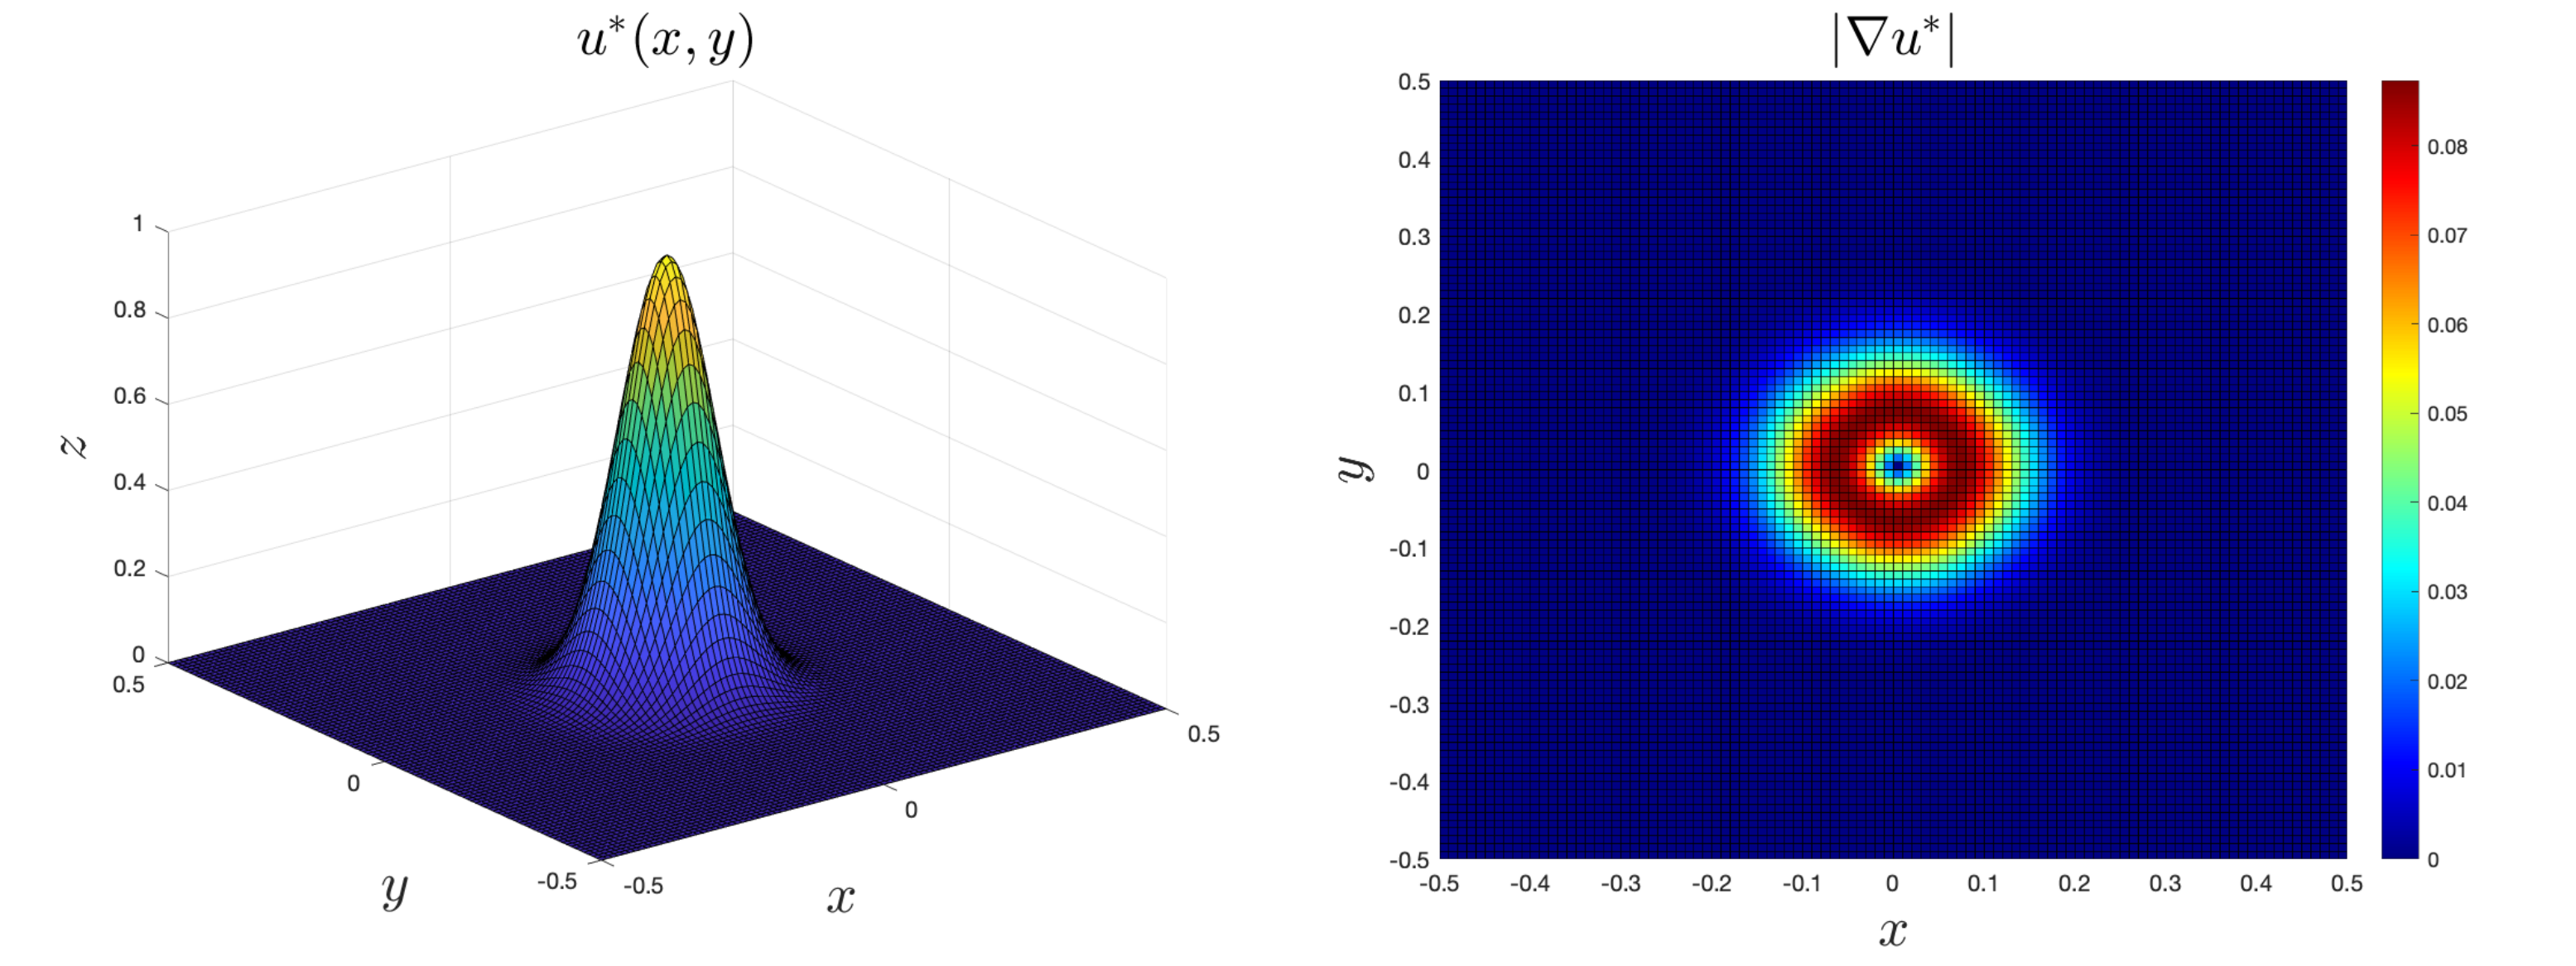

<a id='fig_1'></a> 
    <center><b>Fig. 1. Analytical solution and the norm of its gradient.</b></center>

### Importing necessary modules, setting parameters and paths

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy import optimize
import time
import os
import os.path
import zipfile
import pandas as pd
from scipy.optimize import curve_fit, least_squares
import sys

import gmsh
import math

import matplotlib.image as mpimg
import re

import pyvista as pv
import ipywidgets as widgets
pv.set_plot_theme("document")

plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = "Serif"
plt.rcParams['font.size'] = 20

from pyvirtualdisplay import Display
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()
    
user_name=!whoami # get user name
user_name=user_name[0]
um_view = "/mofem_install/jupyter/%s/um_view" % user_name

### Define utility functions (mesh generation, running the analysis, results post-processing)

In [ ]:
class AttrDict(dict):
    def __getattr__(self, attr):
        if attr in self:
            return self[attr]
        raise AttributeError(f"'AttrDict' object has no attribute '{attr}'")
        
def create_res_list():
    res_list = AttrDict()
    res_list.dof_num = []
    res_list.err_l2_norm = []
    res_list.err_h1_snorm = []
    res_list.err_indic_tot = []
    res_list.err_indic_max = []
    return res_list

def append_res_list(res_list, res):
    if hasattr(res, "dof_num"):
        res_list.dof_num.append(res.dof_num)
    if hasattr(res, "err_l2_norm"):
        res_list.err_l2_norm.append(res.err_l2_norm)
    if hasattr(res, "err_h1_snorm"):
        res_list.err_h1_snorm.append(res.err_h1_snorm)
    if hasattr(res, "err_indic_max"):
        res_list.err_indic_max.append(res.err_indic_max)
    if hasattr(res, "err_indic_tot"):
        res_list.err_indic_tot.append(res.err_indic_tot)

def merge_res_list(full_res_list, res_list):
    if hasattr(res_list, "dof_num"):
        full_res_list.dof_num += res_list.dof_num
    if hasattr(res_list, "err_l2_norm"):
        full_res_list.err_l2_norm += res_list.err_l2_norm
    if hasattr(res_list, "err_h1_snorm"):
        full_res_list.err_h1_snorm += res_list.err_h1_snorm
    if hasattr(res_list, "err_indic_tot"):
        full_res_list.err_indic_tot += res_list.err_indic_tot
    if hasattr(res_list, "err_indic_max"):
        full_res_list.err_indic_max += res_list.err_indic_max

def generate_mesh(params):
    gmsh.initialize()
    
    tol = 0.1
    L = params.side_length
    point1 = gmsh.model.geo.addPoint(-L/2, -L/2, 0, tol)
    point2 = gmsh.model.geo.addPoint(L/2, -L/2, 0, tol)
    point3 = gmsh.model.geo.addPoint(L/2, L/2, 0, tol)
    point4 = gmsh.model.geo.addPoint(-L/2, L/2, 0, tol)

    line1 = gmsh.model.geo.addLine(point1, point2)
    line2 = gmsh.model.geo.addLine(point2, point3)
    line3 = gmsh.model.geo.addLine(point3, point4)
    line4 = gmsh.model.geo.addLine(point4, point1)

    curve_loop = gmsh.model.geo.addCurveLoop([line1, line2, line3, line4])
    plane_surface = gmsh.model.geo.addPlaneSurface([curve_loop])
    
    N = int(L / params.element_size) + 1
    
    gmsh.model.geo.mesh.setTransfiniteCurve(line1, N)
    gmsh.model.geo.mesh.setTransfiniteCurve(line2, N)
    gmsh.model.geo.mesh.setTransfiniteCurve(line3, N)
    gmsh.model.geo.mesh.setTransfiniteCurve(line4, N)
    gmsh.model.geo.mesh.setTransfiniteSurface(plane_surface)
    
    gmsh.model.geo.synchronize()
    
    domain = gmsh.model.addPhysicalGroup(2, [plane_surface])
    gmsh.model.setPhysicalName(2, domain, 'DOMAIN')
    boundary = gmsh.model.addPhysicalGroup(1, [curve_loop])
    gmsh.model.setPhysicalName(1, boundary, 'BOUNDARY')
    
    if not params.triangle_mesh:
        gmsh.option.setNumber("Mesh.RecombineAll", 1)
      
    gmsh.model.mesh.generate(2)
    
    med_file = params.mesh_file + ".med"
    gmsh.write(med_file)

    gmsh.finalize()
    
    h5m_file=params.mesh_file + ".h5m"    
    !read_med -med_file {med_file} -output_file {h5m_file} -log_sl error
    
    if params.show_mesh:
        vtk_file=params.mesh_file + ".vtk"
        !mbconvert {h5m_file} {vtk_file}

        mesh = pv.read(vtk_file)
        mesh = mesh.shrink(0.98)

        p = pv.Plotter(notebook=True)
        p.add_mesh(mesh, smooth_shading=False)

        p.camera_position = "xy"
        p.show(jupyter_backend='ipygany')
    
    return

def parse_log_file(params):
    res_list = create_res_list()
    res = AttrDict()
    with open(params.log_file, "r") as log_file:
        for line in log_file:
            line = line.strip()
            if "nb global dofs" in line:
                res.dof_num = int(line.split()[13])
            if "error indicator (max)" in line:
                res.err_indic_max = float(line.split()[7])
            if "error indicator (total)" in line:
                res.err_indic_tot = float(line.split()[7])
            if "error L2 norm" in line:
                res.err_l2_norm = float(line.split()[7])
            if "error H1 seminorm" in line:
                res.err_h1_snorm = float(line.split()[7])
                append_res_list(res_list, res)
    return res_list

def run_mofem(params):
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    
    !{um_view}/bin/mofem_part -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    
    !rm -rf out* err*
    
    !export OMPI_MCA_btl_vader_single_copy_mechanism=none && \
    nice -n 10 mpirun --oversubscribe --allow-run-as-root \
    -np {params.nproc} {um_view}/tutorials/mix-0/{params.executable} \
    -file_name {params.part_file} \
    -order {params.order} \
    -indic_tol {params.indic_tol} \
    -theta {params.theta} \
    -log_sl {params.verbosity_level} \
    2>&1 | tee {params.log_file}
    
    if params.convert:
        !convert.py -np {params.nproc} out* err*

    return parse_log_file(params)

def show_results(params):
    out_to_vtk = !ls -c1 {params.show_file}_*vtk
    last_file=out_to_vtk[0]

    mesh = pv.read(last_file[:-3] + "vtk")

    if params.show_edges:
        mesh=mesh.shrink(0.95)
        
    jupyter_backend='panel'
    cmap = "turbo"
    if params.show_file == "out":
        jupyter_backend='ipygany'
        if mesh.point_data[params.show_field].ndim > 1:
            cmap = "viridis"

    p = pv.Plotter(notebook=True)
    p.add_mesh(mesh, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
    p.camera_position = "xy"
    
    p.show(jupyter_backend=jupyter_backend)
    
def show_field(params):
    params.show_file = "out"
    show_results(params)
    
def show_error(params):
    params.show_file = "error"
    show_results(params)
    

### Dictionary defining all relevant parameters for solving the problem

In [ ]:
params = AttrDict() # Attribute dictionary for storing the parameters

# Pre-processing parameters
params.mesh_file = "mesh_2d" # no file extension needed
params.side_length = 1 # side length of the square domain
params.element_size = 0.05 # element size in the structured mesh 
params.triangle_mesh = False # set True to use triangle mesh, and False for quad mesh
params.show_mesh = True # set True to show the generated mesh

# Solution parameters
params.executable = "mixed_poisson" # or "standard_poisson"
params.log_file = "log" # log file name
params.convert = True # set True to convert results for-postprocessing
params.nproc = 4 # number of cores/processors to use
params.order = 2 # approximation order p of the field u (field q in the mixed formulation will have order p+1)
params.verbosity_level = "inform" # you can try "verbose" if needed

# Apative p-refinement parameters
params.indic_tol = 0 # tolerance threshold to stop the refinement loop
params.theta = 0 # parmater between [0, 1]

# Post-processing parameters
params.show_field = "U" 
params.show_edges = True

### Generate a mesh

In [ ]:
params.element_size = 0.05 # <- TRY CHANGING THIS
params.triangle_mesh = False # <- TRY CHANGING THIS

params.show_mesh = True
generate_mesh(params)

### Run the analysis

In [ ]:
params.executable = "mixed_poisson"
params.nproc = 4
params.order = 2 # <- TRY CHANGING THIS
run_mofem(params)

### Visualise the results

In [ ]:
params.show_field = "U"
params.show_edges = True # try True
show_field(params)

In [ ]:
params.show_field = "Q"
params.show_edges = False # try True
show_field(params)

### Global convergence study
#### Perform global order and mesh convergence analysis

In [ ]:
order_list = [1, 2, 3, 4] # approximation order p
elem_size_list = [0.05, 0.025, 0.01, 0.005] # element size h

params.indic_tol = 0
params.show_mesh = False

mixed_poisson_test = []
standard_poisson_test = []

params.triangle_mesh = False

for order in order_list:
    params.order = order
    
    mixed_res_list = create_res_list()
    standard_res_list = create_res_list()
    
    for elem_size in elem_size_list:
        params.element_size = elem_size
        generate_mesh(params)
        
        params.executable = "mixed_poisson"
        merge_res_list(mixed_res_list, run_mofem(params))
        
        params.executable = "standard_poisson"
        merge_res_list(standard_res_list, run_mofem(params))
        
    mixed_poisson_test.append(mixed_res_list)
    standard_poisson_test.append(standard_res_list)

#### Plot error L2 norm vs element size

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(order_list)))

for order, c, mixed_res_list, standard_res_list in zip(order_list, colors, mixed_poisson_test, standard_poisson_test):
    plt.loglog(elem_size_list, mixed_res_list.err_l2_norm, ls='-', c=c, label="mixed, p = " + str(order))
    plt.loglog(elem_size_list, standard_res_list.err_l2_norm, ls='--', c=c, label="standard, p = " + str(order))

custom_tick_labels = [str(h) for h in elem_size_list]

plt.xlabel("Element size, h")
plt.ylabel("Error L2 norm")
plt.grid(ls="--")
plt.xticks(elem_size_list, custom_tick_labels)
plt.title("Error L2 norm vs element size")
plt.legend()

plt.show()

#### Plot error H1 seminorm vs element size

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(order_list)))

for order, c, mixed_res_list, standard_res_list in zip(order_list, colors, mixed_poisson_test, standard_poisson_test):
    plt.loglog(elem_size_list, mixed_res_list.err_h1_snorm, ls='-', c=c, label="mixed, p = " + str(order))
    plt.loglog(elem_size_list, standard_res_list.err_h1_snorm, ls=':', c=c, lw=3, label="standard, p = " + str(order))

custom_tick_labels = [str(h) for h in elem_size_list]

plt.xlabel("Element size, h")
plt.ylabel("Error H1 seminorm")
plt.grid(ls="--")
plt.xticks(elem_size_list, custom_tick_labels)
plt.title("Error H1 seminorm vs element size")
plt.legend()

plt.show()

#### Plot  error L2 norm vs DOF number

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(order_list)))

for order, c, mixed_res_list, standard_res_list in zip(order_list, colors, mixed_poisson_test, standard_poisson_test):
    plt.loglog(mixed_res_list.dof_num, mixed_res_list.err_l2_norm, ls='-', c=c, label="mixed, p = " + str(order))
    plt.loglog(standard_res_list.dof_num, standard_res_list.err_l2_norm, ls='--', c=c, label="standard, p = " + str(order))

plt.xlabel("DOF number")
plt.ylabel("Error L2 norm")
plt.grid(ls="--")
plt.title("Error L2 norm vs DOF number")
plt.legend()

plt.show()

#### Plot error H1 seminorm and error indicator vs element size

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(order_list)))

for order, c, mixed_res_list, standard_res_list in zip(order_list, colors, mixed_poisson_test, standard_poisson_test):
    plt.loglog(elem_size_list, mixed_res_list.err_h1_snorm, ls='-', lw=2, c=c, label="error h1 seminorm, p=" + str(order))
    plt.loglog(elem_size_list, mixed_res_list.err_indic_tot, ls=':', lw=4, c=c, label="error indicator, p=" + str(order))

    
custom_tick_labels = [str(h) for h in elem_size_list]

plt.xlabel("Element size, h")
plt.ylabel("Error H1 seminorm, error indicator (total)")
plt.grid(ls="--")
plt.xticks(elem_size_list, custom_tick_labels)
plt.title("Error H1 seminorm and error indicator vs element size")
plt.legend()

plt.show()

### Error indicator analysis

In [ ]:
params.show_mesh = False
params.element_size = 0.05
params.triangle_mesh = False
generate_mesh(params)

params.executable = "mixed_poisson"
params.convert = True
params.order = 2
run_mofem(params)

#### Compare the element-wise distribution of the error *L2 norm* and the error indicator

In [ ]:
params.show_field = "ERROR_L2_NORM"
params.show_edges = True
show_error(params)

In [ ]:
params.show_field = "ERROR_INDICATOR"
params.show_edges = True
show_error(params)

#### Compare the element-wise distribution of the error *H1 seminorm* and the error indicator

In [ ]:
params.show_field = "ERROR_H1_SEMINORM"
params.show_edges = True
show_error(params)

In [ ]:
params.show_field = "ERROR_INDICATOR"
params.show_edges = True
show_error(params)

### Adaptive p-refinement

Run p-adaptive refinement with $\theta = 0.5$. 

In [ ]:
params.order = 1
params.element_size = 0.05
params.show_mesh = False
params.nproc = 4
params.executable = "mixed_poisson"
params.indic_tol = 1e-7
params.convert = False
generate_mesh(params)

params.theta = 0.8 # try different values of theta in range [0, 1] 
                   # to reach the tolerance in minimal number of iterations and/or number of DOFs

adapt_res = run_mofem(params)

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(order_list)))

for order, c, standard_res_list in zip(order_list, colors, standard_poisson_test):
    plt.loglog(standard_res_list.dof_num, standard_res_list.err_h1_snorm, ls='-', c=c, label="standard, p = " + str(order))

plt.loglog(adapt_res.dof_num, adapt_res.err_h1_snorm, ls='-', marker='o', ms=4, c='k', label="mixed, adapt p-ref")
    
plt.xlabel("DOF number")
plt.ylabel("Error H1 seminorm")
plt.grid(ls="--")
plt.legend()

plt.show()